In [34]:
import numpy as np
import pandas as pd
from os import path
import seaborn as sb
import matplotlib

# Task 0
Read the dataset from csv file & perform data cleaning - remove all rows, which contains `?` in some columns.
Also check for data correctness (salary & salary $K).

In [4]:
df = pd.read_csv(path.join("..", "data", "adult.csv"), index_col=[0])
df = df.loc[~(df == '?').any(axis=1)]

In [21]:
df.loc[(df["salary"] == "<=50K") & (df["salary K$"] > 50)]

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary,salary K$


In [22]:
df.loc[(df["salary"] == ">50K") & (df["salary K$"] <= 51)]

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary,salary K$
1481,58,Private,Assoc-voc,Married-civ-spouse,Craft-repair,Husband,White,Male,40,United-States,>50K,51
2950,27,Private,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,42,United-States,>50K,51
7995,38,Private,Prof-school,Separated,Prof-specialty,Not-in-family,White,Male,35,United-States,>50K,51
8880,36,Private,Bachelors,Married-civ-spouse,Sales,Husband,White,Male,40,United-States,>50K,51
12165,39,Self-emp-not-inc,Some-college,Never-married,Prof-specialty,Not-in-family,White,Male,12,United-States,>50K,51
12814,40,Private,Bachelors,Married-civ-spouse,Tech-support,Husband,White,Male,40,United-States,>50K,51
13220,40,Private,Some-college,Married-civ-spouse,Sales,Husband,White,Male,40,United-States,>50K,51
14346,46,Local-gov,Masters,Divorced,Exec-managerial,Unmarried,White,Female,65,United-States,>50K,51
16025,38,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,65,United-States,>50K,51
16502,34,Private,Doctorate,Married-civ-spouse,Prof-specialty,Husband,White,Male,50,United-States,>50K,51


# Task 1
Print the count of men and women in the dataset.

In [25]:
female_count = df["sex"].value_counts()["Female"]
male_count = df["sex"].value_counts()["Male"]
print("Female:", female_count, "Male:", male_count)

Female: 9782 Male: 20380


# Task 2
Find the average age of men in dataset

In [26]:
df.loc[df["sex"] == "Male", "age"].mean()

39.18400392541707

# Task 3
Get the percentage of people from Poland (native-country)

In [40]:
(df["native-country"].value_counts()["Poland"] / df.shape[0]) * 100

0.18566408063125786

# Task 4
Get the mean and standard deviation of the age for people who earn > 50K per year. After this, get it for those who earn <= 50K.

In [41]:
df.loc[df["salary"] == ">50K", "age"].mean()

43.95911028236548

In [42]:
df.loc[df["salary"] == ">50K", "age"].std()

10.269632835673852

In [43]:
df.loc[df["salary"] == "<=50K", "age"].mean()

36.60806038668668

In [44]:
df.loc[df["salary"] == "<=50K", "age"].std()

13.464631257161633

# Task 5
Check, if there are some people without higher education (education: Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters, Doctorate), but with > 50K salary

In [28]:
df.loc[(df["salary"] == ">50K") & ~(df["education"].isin(["Bachelors", "Prof-school", "Assoc-acdm", "Assoc-voc", "Masters", "Doctorate"]))]

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary,salary K$
7,52,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,United-States,>50K,307
10,37,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,Black,Male,80,United-States,>50K,116
55,43,Private,Some-college,Married-civ-spouse,Tech-support,Husband,White,Male,40,United-States,>50K,341
67,53,Private,HS-grad,Married-civ-spouse,Adm-clerical,Wife,White,Female,40,United-States,>50K,225
68,49,Self-emp-inc,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,50,United-States,>50K,194
...,...,...,...,...,...,...,...,...,...,...,...,...
32462,48,Self-emp-inc,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,50,United-States,>50K,343
32518,57,Local-gov,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,40,United-States,>50K,116
32519,46,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,48,United-States,>50K,239
32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K,173


# Task 6
Get the statistics of age for each type of education. Use `groupby` and `describe` for this.

In [30]:
df.groupby("education")["age"].describe().reset_index()

,education,count,mean,std,min,25%,50%,75%,max
0,10th,820.0,37.897561,16.225795,17.0,23.0,36.0,52.0,90.0
1,11th,1048.0,32.363550,15.089307,17.0,18.0,28.5,43.0,90.0
2,12th,377.0,32.013263,14.373710,17.0,19.0,28.0,41.0,79.0
3,1st-4th,151.0,44.622517,14.929051,19.0,33.0,44.0,56.0,81.0
4,5th-6th,288.0,41.649306,14.754622,17.0,28.0,41.0,53.0,82.0
5,7th-8th,557.0,47.631957,15.737479,17.0,34.0,49.0,60.0,90.0
6,9th,455.0,40.303297,15.335754,17.0,28.0,38.0,53.0,90.0
7,Assoc-acdm,1008.0,37.286706,10.509755,19.0,29.0,36.0,44.0,90.0
8,Assoc-voc,1307.0,38.246366,11.181253,19.0,30.0,37.0,45.0,84.0
9,Bachelors,5044.0,38.641554,11.577566,19.0,29.0,37.0,46.0,90.0


# Task 7
Compare the married and non-married men salaries. Who earns more? (>50K or <=50K)
Married men are those, whom `marital-status` starts with "Married". Others are not.

In [8]:
df.loc[df["marital-status"].str.startswith("Married"), "salary"].value_counts()

salary
<=50K    8016
>50K     6440
Name: count, dtype: int64

In [9]:
df.loc[~df["marital-status"].str.startswith("Married"), "salary"].value_counts()

salary
<=50K    14638
>50K      1068
Name: count, dtype: int64

# Task 8
Get the max hours per week some person works. How many people works the same amount of hours per week?

In [11]:
max_hours = df["hours-per-week"].max()
max_hours

99

In [15]:
df.loc[df["hours-per-week"] == max_hours].shape[0]

78

# Task 9
Analyze the correlation between data in dataset. Understand connected fields in it and print highlight thier connection.

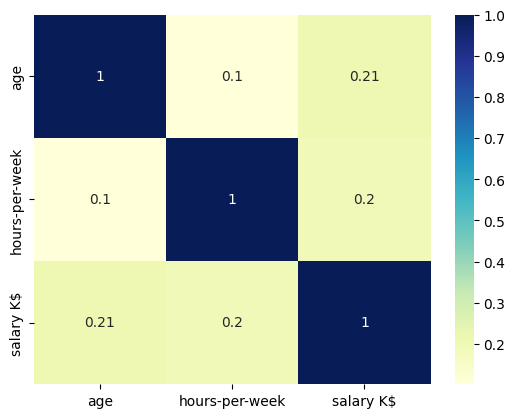

In [35]:
df_cor = df[["age", "hours-per-week", "salary K$"]].copy()
df_cor.corr()
dataplot = sb.heatmap(df_cor.corr(), cmap="YlGnBu", annot=True)
matplotlib.pyplot.show()